이산형 확률분포

In [3]:
# 1차원 이산확률분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
X = [x_set, f]

In [4]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

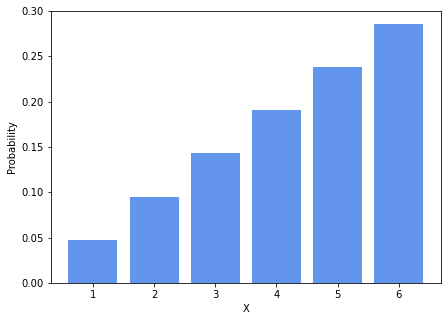

In [5]:
plt.figure(figsize=(7,5))
plt.bar(x_set, prob, color= 'cornflowerblue')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()


Text(0.5, 1.0, 'Bar Graph')

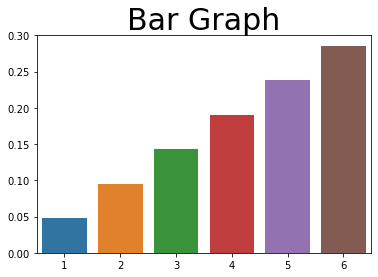

In [6]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)

In [7]:
np.all(prob>=0)

True

In [8]:
np.sum(prob)

0.9999999999999999

In [9]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
F(6)

0.9999999999999999

In [11]:
# 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [12]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부른다.
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.330219

In [14]:
# 기댓값
def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])    

In [15]:
E(X)

4.333333333333333

In [16]:
E(X, g=lambda x:2*x+3)

11.666666666666664

In [17]:
# 기댓값의 선형성
2 * E(X) + 3

11.666666666666666

In [18]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [19]:
# 일반화
def V(X, g = lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)**2 *f(i) for i in x_set])

In [20]:
V(X)

2.2222222222222223

In [21]:
V(X, lambda x:2*x+3)

8.88888888888889

In [22]:
# 분산의 공식
2**2*V(X)

8.88888888888889

In [23]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [24]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [25]:
XY = [x_set, y_set, f_XY]

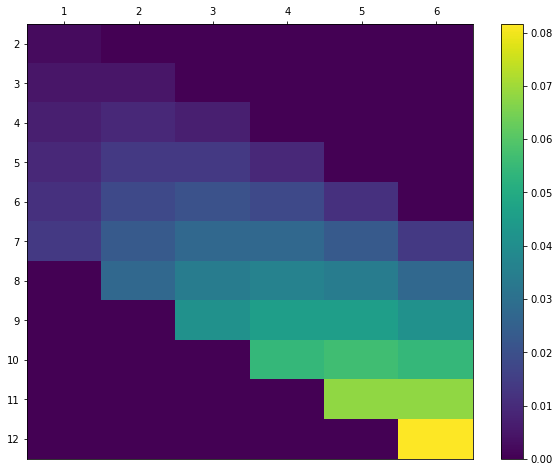

In [26]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
# Y축을 내림차순의 숫자가 되게 하여 위아래를 역전시킨다.
ax.invert_yaxis()
# X축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)           

In [27]:
np.all(prob >= 0)

True

In [28]:
np.sum(prob)

1.0

In [29]:
# 주변확률분포 : 확률변수 (X,Y)는 결합확류분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임. 즉 확률변수 X의 확률함수를 알고 싶은 상황

In [30]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [31]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [32]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [33]:
X

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [34]:
Y

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

Text(0, 0.5, 'probability')

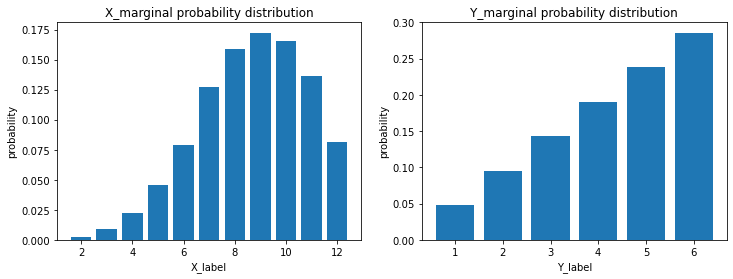

In [35]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_label')
ax1.set_ylabel('probability')
# ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_label')
ax2.set_ylabel('probability')
# ax2.set_xticks(y_set)

In [36]:
# 2차원 이산형 확률분포의 지표
# 기댓값
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [37]:
# 다중 for문
sum = 0
for y_j in y_set:
    for x_i in x_set:
        sum += x_i * f_XY(x_i, y_j)
sum

8.666666666666666

In [38]:
def E(XY, g):
    x_set, y_set ,f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [39]:
mean_X = E(XY, lambda x,y:x)
mean_X

8.666666666666666

In [40]:
mean_Y = E(XY, lambda x,y :y)
mean_Y

4.333333333333333

In [41]:
a,b = 2,3

In [42]:
# 기댓값의 선형성
E(XY, lambda x,y:a*x +b*y)

30.333333333333332

In [43]:
# 분산 : X의 분산이라면 X에 관한 편차 제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [44]:
# 분산의 함수
def V(XY, g ):
    x_set,y_set, f_XY = XY
    mean = E(XY , g)
    return np.sum([(g(x_i,y_j) - mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [45]:
var_X = V(XY,lambda x,y:x)
var_X

4.444444444444444

In [46]:
var_Y = V(XY,lambda x,y:y)
var_Y

2.2222222222222223

In [47]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x,y:x)
    mean_Y = E(XY, lambda x,y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

In [48]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [49]:
V(XY, lambda x,y:a*x + b*y)

64.44444444444444

In [50]:
# 분산과 공분산의 공식
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [51]:
# 확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
cov_xy/ np.sqrt(var_X * var_Y)

0.7071067811865474

대표적인 이산형 확률분포

In [52]:
# assert : 원하는 조건의 변수 값을 보증받을 때까지 테스트
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label ='prob')
    ax.vlines(E(X), 0,1, label='mean',color='crimson')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()    

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률

In [53]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [54]:
p = 0.3
X = Bern(p)

In [55]:
check_prob(X)

expected value 0.3
variance 0.21


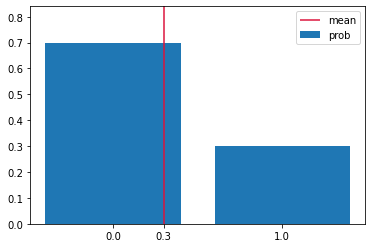

In [56]:
plot_prob(X)

In [57]:
rv = stats.bernoulli(p)

In [58]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [59]:
rv.pmf([0,1])

array([0.7, 0.3])

In [60]:
rv.cdf([0,1])

array([0.7, 1. ])

In [61]:
rv.mean(), rv.var()

(0.3, 0.21)

#### 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)

       0              (otherwise)

In [62]:
# [과제] 사용자 함수
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [63]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요.
n = 10
p = 0.3
X = Bin(n, p)
check_prob(X)

expected value 3.0
variance 2.1


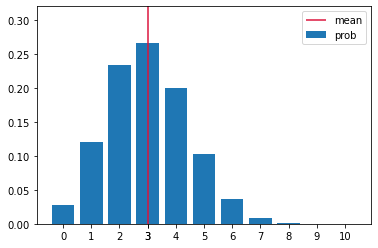

In [64]:
# [과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(X)

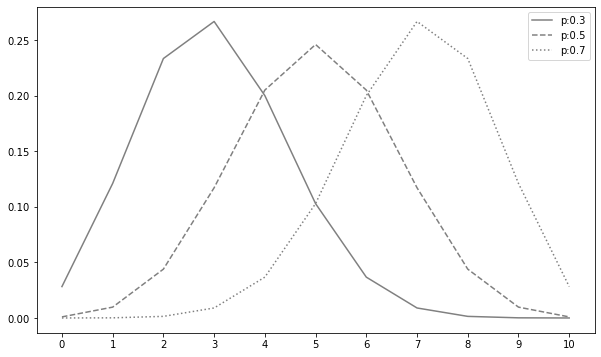

In [65]:
# [과제] 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변화는 모습을 시각화 하세요

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3...\})$

       0             (otherwise)
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$

In [66]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 29 이하인 정수으로 설정)
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f
    

In [67]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.
p = 0.5
X = Ge(p)
check_prob(X)

expected value 2.0
variance 2.0


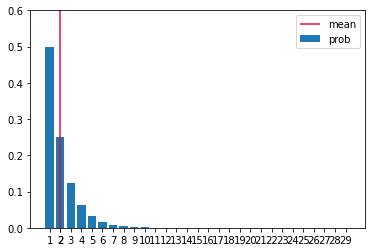

In [68]:
# [과제] 상기 기하분포의 확률함수와 기댓값을 시각화 하세요.

plot_prob(X)

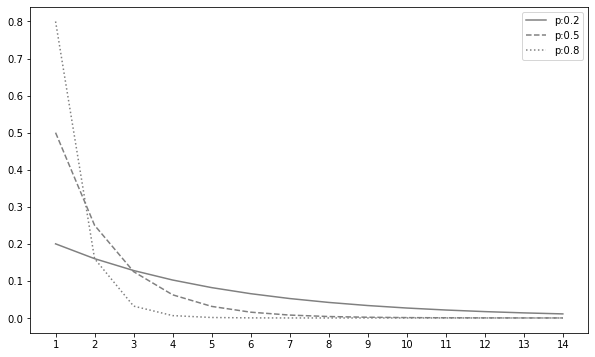

In [69]:
# [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 하세요
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.  
예) 하루에 교통사고가 한 건도 일어나지 않을 확률 : P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

        0                (otherwise)

In [70]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 19 이하인 정수으로 설정)
#분산과 기댓값이 같은게 특징
from scipy.special import factorial
#np.power(a,b) a를 b만큼제곱함
#np.exp exponential 값을 반환 e=2.71
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [71]:
# [과제] 𝜆 가 0.3일때 포아송분포의 기댓값과 분산을 구하세요.
lam = 3
X = Poi(lam)
check_prob(X)

expected value 3.0
variance 3.0


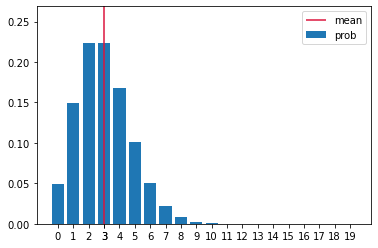

In [72]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(X)

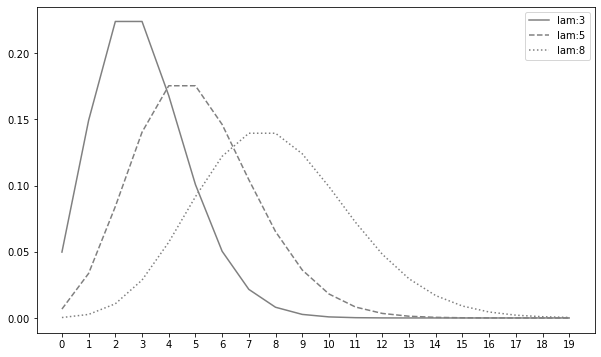

In [73]:
# [과제]  𝜆 가  3, 5, 8로 변할 때 확률함수가 변화는 모습을 시각화 하세요
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [74]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명 하세요.